In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [81]:
df = pd.read_csv('/content/drive/My Drive/Google Colab/Neural Network/Keras/My_Code_Keras/housing-data.csv')
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


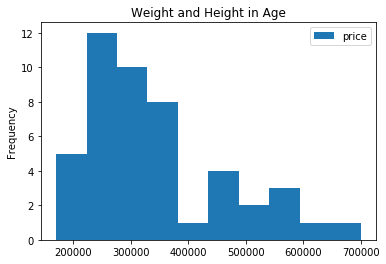

In [14]:
df.plot(kind='hist',
        x = 'age',
        y = 'price',
        title='Weight and Height in Age')

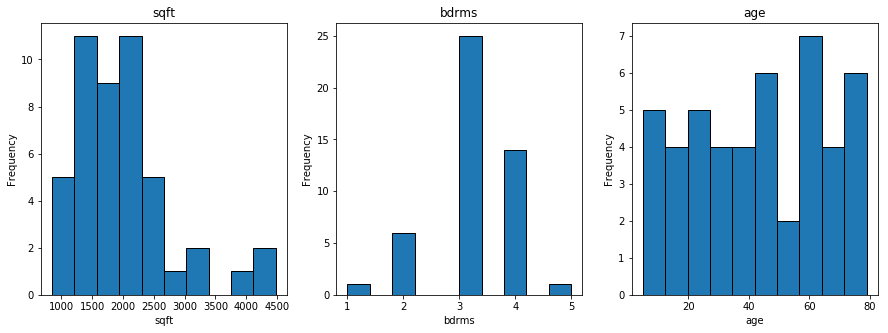

In [31]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['sqft', 'bdrms', 'age']):
  plt.subplot(1, 3, i+1)
  df[feature].plot(edgecolor='black',
        kind='hist',
        title=feature)
  plt.xlabel(feature)

In [0]:
x = df[['sqft', 'bdrms','age']].values
y = df['price'].values

In [100]:
print(x,y)

[[2104    3   70]
 [1600    3   28]
 [2400    3   44]
 [1416    2   49]
 [3000    4   75]
 [1985    4   61]
 [1534    3   12]
 [1427    3   57]
 [1380    3   14]
 [1494    3   15]
 [1940    4    7]
 [2000    3   27]
 [1890    3   45]
 [4478    5   49]
 [1268    3   58]
 [2300    4   77]
 [1320    2   62]
 [1236    3   78]
 [2609    4    5]
 [3031    4   21]
 [1767    3   44]
 [1888    2   79]
 [1604    3   13]
 [1962    4   53]
 [3890    3   36]
 [1100    3   60]
 [1458    3   29]
 [2526    3   13]
 [2200    3   28]
 [2637    3   25]
 [1839    2   40]
 [1000    1    5]
 [2040    4   75]
 [3137    3   67]
 [1811    4   24]
 [1437    3   50]
 [1239    3   22]
 [2132    4   28]
 [4215    4   66]
 [2162    4   43]
 [1664    2   40]
 [2238    3   37]
 [2567    4   57]
 [1200    3   76]
 [ 852    2   70]
 [1852    4   64]
 [1203    3   11]] [399900 329900 369000 232000 539900 299900 314900 198999 212000 242500
 239999 347000 329999 699900 259900 449900 299900 199900 499998 599000
 252900 255

In [101]:
model = Sequential()
model.add(Dense(1, input_shape=(3,))) # input shape 3 input
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [109]:
model.fit(x_train, y_train, epochs=80)

Epoch 1/80
37/37 [==============================] - 0s 6ms/step - loss: 45722820165.1892
Epoch 2/80
37/37 [==============================] - 0s 117us/step - loss: 44337965000.6486
Epoch 3/80
37/37 [==============================] - 0s 131us/step - loss: 42929522189.8378
Epoch 4/80
37/37 [==============================] - 0s 112us/step - loss: 41570912643.4595
Epoch 5/80
37/37 [==============================] - 0s 128us/step - loss: 40198489171.0270
Epoch 6/80
37/37 [==============================] - 0s 249us/step - loss: 38916543017.5135
Epoch 7/80
37/37 [==============================] - 0s 124us/step - loss: 37662410364.5405
Epoch 8/80
37/37 [==============================] - 0s 129us/step - loss: 36348066068.7568
Epoch 9/80
37/37 [==============================] - 0s 111us/step - loss: 35146681371.6757
Epoch 10/80
37/37 [==============================] - 0s 103us/step - loss: 33941314255.5676
Epoch 11/80
37/37 [==============================] - 0s 113us/step - loss: 32761680425.5135

In [110]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


In [113]:
df['sqft1000'] = df['sqft']/1000.0
df['age10'] = df['age']/10.0
df['price100k'] = df['price']/1e5
df.describe()

,sqft,bdrms,age,price,sqft1000,age10,price100k
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574,2.000681,4.274468,3.404127
std,794.702354,0.760982,22.873440,125039.899586,0.794702,2.287344,1.250399
min,852.000000,1.000000,5.000000,169900.000000,0.852000,0.500000,1.699000
25%,1432.000000,3.000000,24.500000,249900.000000,1.432000,2.450000,2.499000
50%,1888.000000,3.000000,44.000000,299900.000000,1.888000,4.400000,2.999000
75%,2269.000000,4.000000,61.500000,384450.000000,2.269000,6.150000,3.844500
max,4478.000000,5.000000,79.000000,699900.000000,4.478000,7.900000,6.999000


In [0]:
x = df[['sqft1000', 'bdrms','age10']].values
y = df['price100k'].values

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [115]:
model = Sequential()
model.add(Dense(1, input_dim=3))
model.compile(Adam(lr=0.1), 'mean_squared_error')
model.fit(x_train, y_train, epochs=20, verbose=0)

Epoch 1/20
37/37 [==============================] - 0s 5ms/step - loss: 43.9342
Epoch 2/20
37/37 [==============================] - 0s 109us/step - loss: 25.4144
Epoch 3/20
37/37 [==============================] - 0s 122us/step - loss: 11.0441
Epoch 4/20
37/37 [==============================] - 0s 114us/step - loss: 3.2804
Epoch 5/20
37/37 [==============================] - 0s 119us/step - loss: 1.6812
Epoch 6/20
37/37 [==============================] - 0s 116us/step - loss: 4.0581
Epoch 7/20
37/37 [==============================] - 0s 114us/step - loss: 7.0332
Epoch 8/20
37/37 [==============================] - 0s 113us/step - loss: 7.6750
Epoch 9/20
37/37 [==============================] - 0s 112us/step - loss: 6.0279
Epoch 10/20
37/37 [==============================] - 0s 109us/step - loss: 3.5760
Epoch 11/20
37/37 [==============================] - 0s 102us/step - loss: 1.7474
Epoch 12/20
37/37 [==============================] - 0s 102us/step - loss: 1.2070
Epoch 13/20
37/37 [=====

In [126]:
model.fit(x_train, y_train, epochs=20, verbose=0)

<h2><center>R2 Score

In [0]:
from sklearn.metrics import r2_score

In [127]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print("R2 score for train :\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("R2 score for test :\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

R2 score for train :	0.715
R2 score for test :	0.720
